# Crime Rate Prediction using Python and SQL

## Installing necessary libraries
* pandas, numpy — for data handling and numerical operations
* matplotlib, seaborn — for data visualization

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Dataset

In [18]:
Crime_data_df = pd.read_csv('ChicagoCrimeData.csv')
Census_data_df = pd.read_csv('ChicagoCensusData.csv')
Chicago_public_schools_data_df = pd.read_csv('ChicagoPublicSchools.csv')

## Preview the Dataset

In [24]:
print('Chicago Crime Data:')
print(Crime_data_df.head(),'\n')

print('Chicago Census Data:')
print(Census_data_df.head(),'\n')

print('Chicago Public Schools Data:')
print(Chicago_public_schools_data_df.head(),'\n')

Chicago Crime Data:
         ID CASE_NUMBER        DATE                     BLOCK IUCR  \
0   3512276    HK587712  2004-08-28        047XX S KEDZIE AVE  890   
1   3406613    HK456306  2004-06-26  009XX N CENTRAL PARK AVE  820   
2   8002131    HT233595  2011-04-04        043XX S WABASH AVE  820   
3   7903289    HT133522  2010-12-30      083XX S KINGSTON AVE  840   
4  10402076    HZ138551  2016-02-02           033XX W 66TH ST  820   

  PRIMARY_TYPE                    DESCRIPTION          LOCATION_DESCRIPTION  \
0        THEFT                  FROM BUILDING            SMALL RETAIL STORE   
1        THEFT                 $500 AND UNDER                         OTHER   
2        THEFT                 $500 AND UNDER  NURSING HOME/RETIREMENT HOME   
3        THEFT  FINANCIAL ID THEFT: OVER $300                     RESIDENCE   
4        THEFT                 $500 AND UNDER                         ALLEY   

   ARREST  DOMESTIC  ...  DISTRICT  WARD  COMMUNITY_AREA_NUMBER  FBICODE  \
0   Fals

## Cleaning and preparing the Data

In [29]:
#Conerting Date to datetime
Crime_data_df['DATE'] = pd.to_datetime(Crime_data_df['DATE'],errors = 'coerce')

# Dropping rows with missing values
Crime_data_df = Crime_data_df.dropna(subset = ['DATE'])

# Problems

## Problem 1
#### Find the total number of crimes recorded in CRIME table

In [33]:
Total_Crimes = len(Crime_data_df)
print("Total number of crimes recorded :",Total_Crimes)

Total number of crimes recorded : 533


## Problem 2
#### List Community area names and numbers with per capita income less than 11000.

In [150]:
# Filtering the rows with per capita income < 11000
low_income_areas = Census_data_df[Census_data_df['PER_CAPITA_INCOME'] < 11000]

# Storing the results and displaying
result = low_income_areas[['COMMUNITY_AREA_NAME','COMMUNITY_AREA_NUMBER','PER_CAPITA_INCOME']]
print('Community areas with per capita income less than 11000 are :')
print(result)

Community areas with per capita income less than 11000 are :
   COMMUNITY_AREA_NAME  COMMUNITY_AREA_NUMBER  PER_CAPITA_INCOME
25  West Garfield Park                   26.0              10934
29      South Lawndale                   30.0              10402
36         Fuller Park                   37.0              10432
53           Riverdale                   54.0               8201


### Plotting the community areas

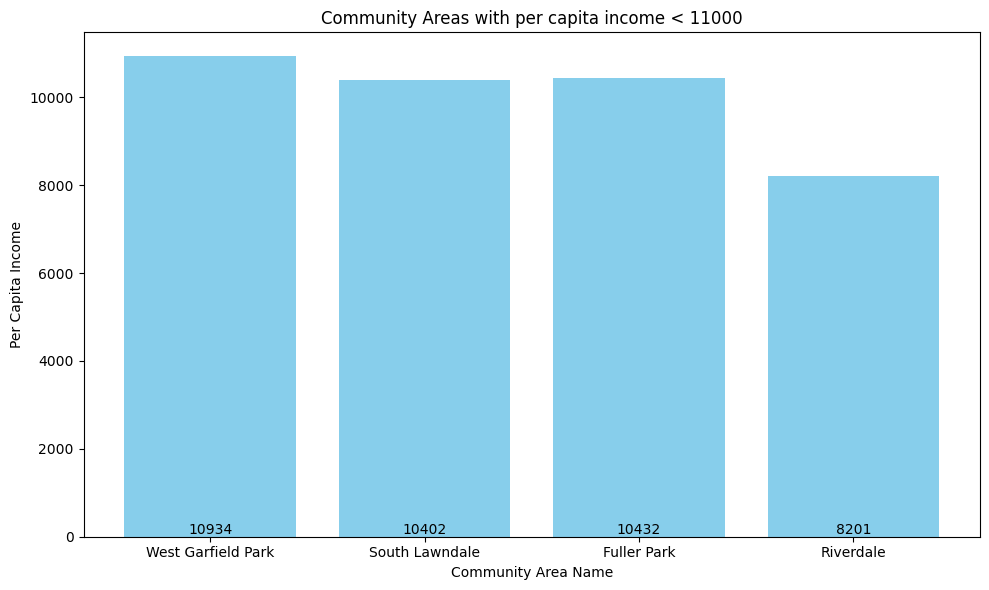

In [162]:
#plot
plt.figure(figsize=(10, 6))
plt.bar(low_income_areas['COMMUNITY_AREA_NAME'],low_income_areas['PER_CAPITA_INCOME'], color = 'skyblue')
for i, val in enumerate(low_income_areas['PER_CAPITA_INCOME']):
    plt.text(i, i, val, ha = 'center', va = 'bottom', fontsize = 10)
plt.xticks(rotation=0)
plt.xlabel('Community Area Name')
plt.ylabel('Per Capita Income')
plt.title('Community Areas with per capita income < 11000')
plt.tight_layout()
plt.show()

## Problem 3
#### List all case numbers for crimes involving minors?(children are not considered minors for the purposes of crime analysis)

In [64]:
# Filter rows where description contains 'MINOR' keyword
Crimes_involving_minors = Crime_data_df[Crime_data_df['DESCRIPTION'].str.upper().str.contains('MINOR')]

#Finding the unique Crime case numbers
Case_numbers = Crimes_involving_minors['CASE_NUMBER'].unique()

# Display the Case numbers
print('Case numbers for crimes involving minors : ')
print(Case_numbers)

Case numbers for crimes involving minors : 
['HL266884' 'HK238408']


### Plotting the crimes involving minors

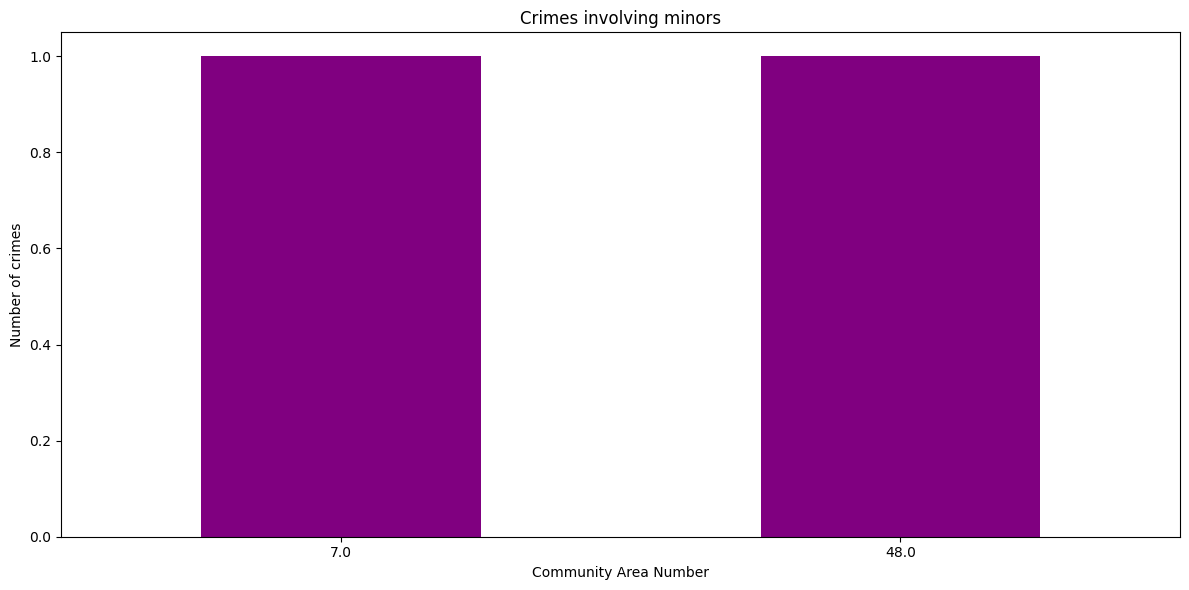

In [78]:
# Count the number of crimes ionvolving minors
count = Crimes_involving_minors['COMMUNITY_AREA_NUMBER'].value_counts().sort_index()

#Plot Bar Chart
plt.figure(figsize=(12,6))
count.plot(kind = 'bar', color = 'purple')
plt.xlabel('Community Area Number')
plt.ylabel('Number of crimes')
plt.title('Crimes involving minors')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Plotting horizontal bar chart

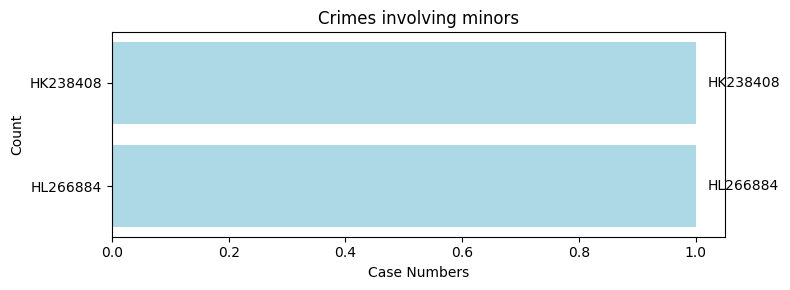

In [79]:
# Plotting horizontal bar graph
plt.figure(figsize=(8,3))
plt.barh(Case_numbers, [1]*len(Case_numbers),color = 'lightblue')
for i, val in enumerate(Case_numbers):
    plt.text(1.02, i, val, va = 'center', fontsize = 10)
plt.xlabel('Case Numbers')
plt.ylabel('Count')
plt.title('Crimes involving minors')
plt.tight_layout()
plt.show()

## Problem 4
#### List all kidnapping crimes involving a child?

In [86]:
# Filter the Crimes data with primary type as 'KIDNAPPING' description as 'child'
kidnapping_crimes = Crime_data_df[(Crime_data_df['PRIMARY_TYPE'] == 'KIDNAPPING') & (Crime_data_df['DESCRIPTION'].str.contains('Child', case = False, na = False))]

# Display the crime records
print('Kidnapping Crimes involving a child :')
print(kidnapping_crimes)

Kidnapping Crimes involving a child :
          ID CASE_NUMBER       DATE                 BLOCK  IUCR PRIMARY_TYPE  \
520  5276766    HN144152 2007-01-26  050XX W VAN BUREN ST  1792   KIDNAPPING   

                  DESCRIPTION LOCATION_DESCRIPTION  ARREST  DOMESTIC  ...  \
520  CHILD ABDUCTION/STRANGER               STREET   False     False  ...   

     DISTRICT  WARD  COMMUNITY_AREA_NUMBER  FBICODE X_COORDINATE  \
520        15  29.0                   25.0       20    1143050.0   

     Y_COORDINATE  YEAR   LATITUDE  LONGITUDE                       LOCATION  
520     1897546.0  2007  41.874908 -87.750249  (41.874908413, -87.750249307)  

[1 rows x 21 columns]


### Plotting the Kidnapping crimes involving child

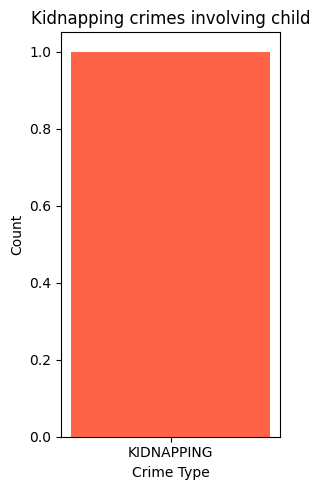

In [94]:
# Bar plot
count = len(kidnapping_crimes)

plt.figure(figsize=(3,5))
plt.bar(kidnapping_crimes['PRIMARY_TYPE'],[count],color = 'tomato')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Kidnapping crimes involving child')
plt.tight_layout()
plt.show()

## Problem 5
#### List the kind of crimes that are recorded are school. (No repetitions)

In [99]:
# Filter the Crime data to fetch the crime types with location description as 'School'
crimes_at_school = Crime_data_df[Crime_data_df['LOCATION_DESCRIPTION'].str.contains('SCHOOL', case = False, na = False)]

# Display the Crime types
print(crimes_at_school['PRIMARY_TYPE'].unique())

['BATTERY' 'CRIMINAL DAMAGE' 'NARCOTICS' 'ASSAULT' 'CRIMINAL TRESPASS'
 'PUBLIC PEACE VIOLATION']


### Plotting the number of crimes recorded at school

In [100]:
print(crimes_at_school['PRIMARY_TYPE'])

118                   BATTERY
121                   BATTERY
141                   BATTERY
166                   BATTERY
183                   BATTERY
220           CRIMINAL DAMAGE
263                 NARCOTICS
265                 NARCOTICS
364                   ASSAULT
471         CRIMINAL TRESPASS
498    PUBLIC PEACE VIOLATION
499    PUBLIC PEACE VIOLATION
Name: PRIMARY_TYPE, dtype: object


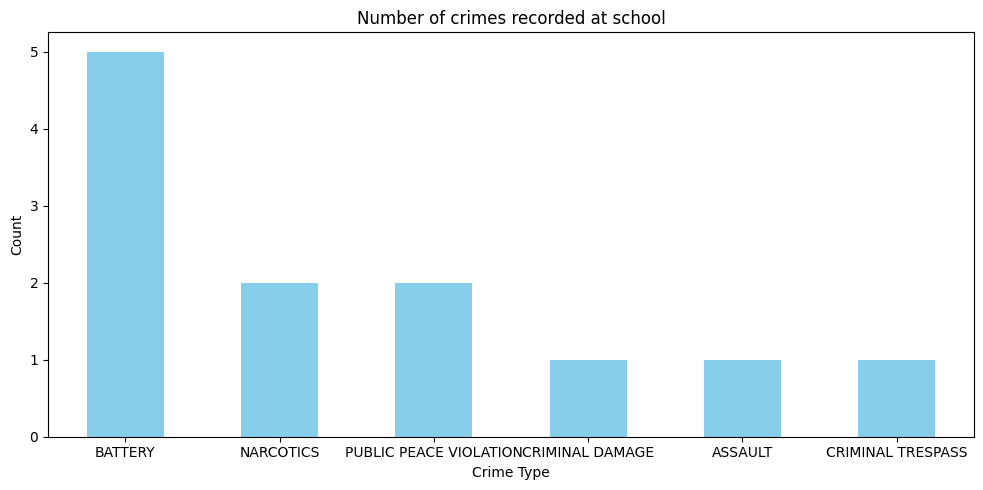

In [107]:
# Identify the count of each crime type recorded at school
value_counts = pd.Series(crimes_at_school['PRIMARY_TYPE']).value_counts()

# Plot the bar chart to display the number of crimes recorded at school
plt.figure(figsize=(10,5))
value_counts.plot(kind = 'bar', color = 'skyblue')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Number of crimes recorded at school')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Problem 6
#### List the type of schools along with the average safety score for each type

In [120]:
# Group by school type and average the safety score
avg_safety_score = Chicago_public_schools_data_df.groupby('Elementary, Middle, or High School')['SAFETY_SCORE'].mean().reset_index()
avg_safety_score.columns = ['School Type', 'Average Safety Score']

# Display the results
print(avg_safety_score)

  School Type  Average Safety Score
0          ES             49.520384
1          HS             49.623529
2          MS             48.000000


### Plotting the List of schools types with average safety score

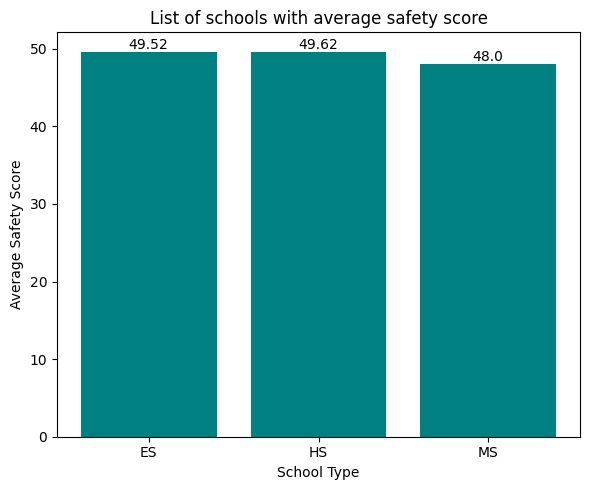

In [174]:
# Bar Plot
plt.figure(figsize = (6,5))
plt.bar(avg_safety_score['School Type'], avg_safety_score['Average Safety Score'], color = 'teal')
for i,val in enumerate( avg_safety_score['Average Safety Score']):
    plt.text(i, val, round(val,2), ha = 'center', va = 'bottom', fontsize = 10)
plt.xlabel('School Type')
plt.ylabel('Average Safety Score')
plt.title('List of schools with average safety score')
plt.tight_layout()
plt.show()

## Problem 7
#### List 5 community areas with highest % of households below poverty line

In [128]:
# Sort the Census data by 'PERCENT_HOUSEHOLDS_BELOW_POVERTY' in Descending order
sorted_census_data_df = Census_data_df.sort_values(by = 'PERCENT_HOUSEHOLDS_BELOW_POVERTY', ascending = False)

# Fetch the top 5 records
top5_poverty = sorted_census_data_df.head(5)

comm_areas_bpl = top5_poverty[['COMMUNITY_AREA_NAME', 'COMMUNITY_AREA_NUMBER', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY']]

# Display the records
print(comm_areas_bpl)

   COMMUNITY_AREA_NAME  COMMUNITY_AREA_NUMBER  \
53           Riverdale                   54.0   
36         Fuller Park                   37.0   
67           Englewood                   68.0   
28      North Lawndale                   29.0   
26  East Garfield Park                   27.0   

    PERCENT_HOUSEHOLDS_BELOW_POVERTY  
53                              56.5  
36                              51.2  
67                              46.6  
28                              43.1  
26                              42.4  


### Plotting the top 5 community areas with highest % of households below poverty line

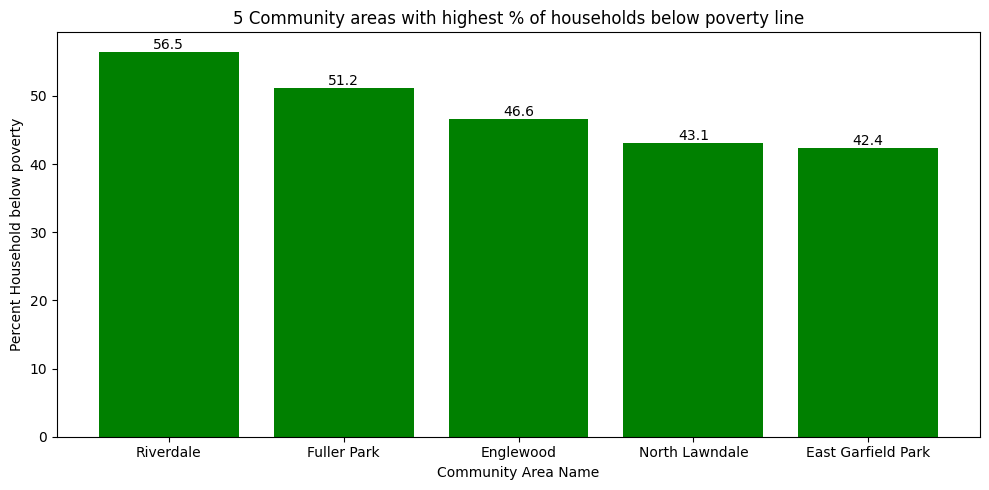

In [144]:
# Bar Plot
plt.figure(figsize=(10,5))
plt.bar(comm_areas_bpl['COMMUNITY_AREA_NAME'], comm_areas_bpl['PERCENT_HOUSEHOLDS_BELOW_POVERTY'], color = 'green')
for i, val in enumerate(comm_areas_bpl['PERCENT_HOUSEHOLDS_BELOW_POVERTY']):
    plt.text(i, val, val, ha = 'center', va = 'bottom', fontsize = 10)
plt.xlabel('Community Area Name')
plt.ylabel('Percent Household below poverty')
plt.title('5 Community areas with highest % of households below poverty line')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Problem 8
#### Which community area is most crime prone? Display the coumminty area number only.

In [207]:
# Group by the Crime data by 'COMMUNITY_AREA_NUMBER' in descending order with count
crime_prone_areas = Crime_data_df['COMMUNITY_AREA_NUMBER'].value_counts().idxmax()

print("Community area with most crimes : ",crime_prone_areas)

Community area with most crimes :  25.0


### Plotting the community area with highest crime rate

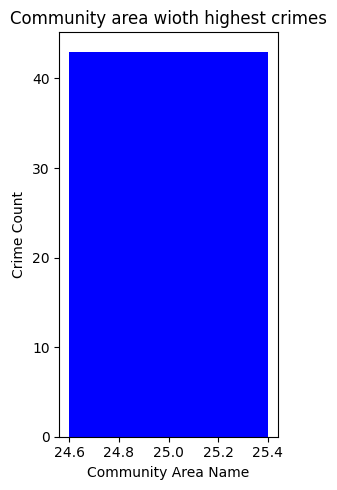

In [278]:
crime_count = Crime_data_df['COMMUNITY_AREA_NUMBER'].value_counts().reset_index()
crime_count.columns = ['COMMUNITY_AREA_NAME', 'CRIME_COUNT']

top_crime_area = crime_count.iloc[0]
# bar plot
plt.figure(figsize=(3,5))
plt.bar(top_crime_area['COMMUNITY_AREA_NAME'],top_crime_area['CRIME_COUNT'],color = 'blue')
#for i, val in enumerate([top_crime_area['CRIME_COUNT']]):
#    plt.text(i, val, val, ha = 'center', va = 'bottom', fontsize = 10)
plt.xlabel('Community Area Name')
plt.ylabel('Crime Count')
plt.title('Community area wioth highest crimes')
plt.tight_layout()
plt.show()

## Problem 9
#### Use a sub-query to find the name of the community area with highest hardship index

In [233]:
# Get the max 'HARDSHIP_INDEX'
max_hardship = Census_data_df['HARDSHIP_INDEX'].max()

comm_area = Census_data_df[Census_data_df['HARDSHIP_INDEX']==max_hardship][['COMMUNITY_AREA_NAME','HARDSHIP_INDEX']]
# Display the results
print('Community area with highest hardship index : ')
print(comm_area)

Community area with highest hardship index : 
   COMMUNITY_AREA_NAME  HARDSHIP_INDEX
53           Riverdale            98.0


### Plotting the community area with highest hardship index

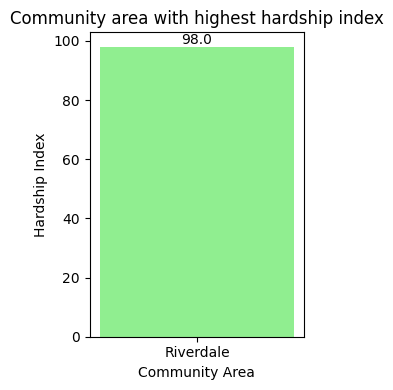

In [236]:
#bar plot
plt.figure(figsize=(3,4))
plt.bar(comm_area['COMMUNITY_AREA_NAME'], comm_area['HARDSHIP_INDEX'], color = 'lightgreen')
for i, val in enumerate(comm_area['HARDSHIP_INDEX']):
    plt.text(i, val, val, ha = 'center', va = 'bottom', fontsize = 10)
plt.xlabel('Community Area')
plt.ylabel('Hardship Index')
plt.title('Community area with highest hardship index')
plt.tight_layout()
plt.show()

## Problem 10
#### Use a sub-query to determine the Community Area Name with most number of crimes?

In [269]:
# Count the number of crimes for each community area
crime_counts = Crime_data_df['COMMUNITY_AREA_NUMBER'].value_counts().idxmax()

# Community area with max crimes
comm_area = Census_data_df[Census_data_df['COMMUNITY_AREA_NUMBER'] == crime_counts]

# display the records
print(comm_area['COMMUNITY_AREA_NAME'])

24    Austin
Name: COMMUNITY_AREA_NAME, dtype: object


### Plotting the Community area anme wth most number of 

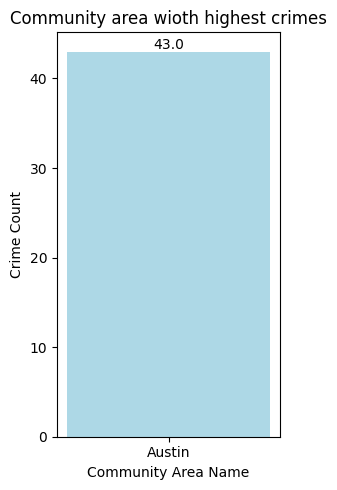

In [276]:
# Bar plot
crime_count = Crime_data_df['COMMUNITY_AREA_NUMBER'].value_counts().reset_index()
crime_count.columns = ['COMMUNITY_AREA_NAME', 'CRIME_COUNT']

top_crime_area = crime_count.iloc[0]
# bar plot
plt.figure(figsize=(3,5))
plt.bar(comm_area['COMMUNITY_AREA_NAME'],top_crime_area['CRIME_COUNT'],color = 'lightblue')
for i, val in enumerate([top_crime_area['CRIME_COUNT']]):
    plt.text(i, val + 1.5, val, ha = 'center', va = 'top', fontsize = 10)
plt.xlabel('Community Area Name')
plt.ylabel('Crime Count')
plt.title('Community area wioth highest crimes')
plt.tight_layout()
plt.show()

# Author
### Manisha Linguntla